<a href="https://colab.research.google.com/github/AnitLearner/Number-recognition-using-LeNet-5/blob/main/Lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Loading and preprocessing the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


Defining the LeNet-5 model

In [ ]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 18s 44ms/step - loss: 0.4224 - accuracy: 0.8787 - val_loss: 0.1603 - val_accuracy: 0.9516
Epoch 2/10
375/375 [==============================] - 16s 44ms/step - loss: 0.1219 - accuracy: 0.9635 - val_loss: 0.0999 - val_accuracy: 0.9694
Epoch 3/10
375/375 [==============================] - 18s 49ms/step - loss: 0.0856 - accuracy: 0.9746 - val_loss: 0.0851 - val_accuracy: 0.9737
Epoch 4/10
375/375 [==============================] - 16s 44ms/step - loss: 0.0690 - accuracy: 0.9787 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 5/10
375/375 [==============================] - 16s 43ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 6/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 7/10
375/375 [==============================] - 17s 45ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.0629 - val_accuracy:

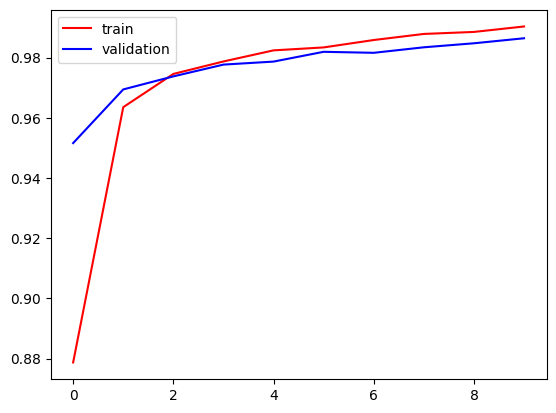

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

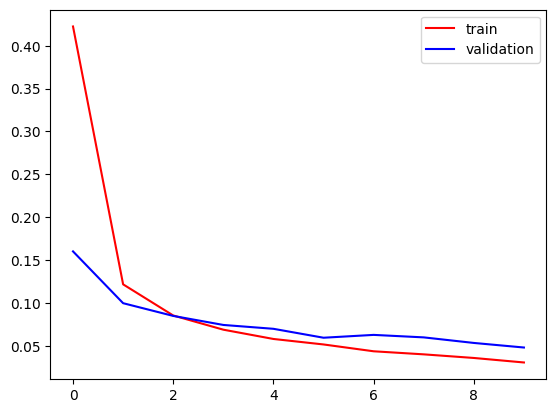

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()